# 1.create a model

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [24]:
# create a model class that inherits nn.Module 这里是Module 不是model
class Model(nn.Module):
    #input layer (4 features of the flower) -->
    #  Hidden layer1 (number of neurons) -->
    #  H2(n) --> output (3 classed of iris flowers)
    def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
        super().__init__() # instantiate out nn.Module 实例化
        self.fc1 = nn.Linear(in_features= in_features, out_features= h1)
        self.fc2 = nn.Linear(in_features= h1, out_features= h2)
        self.out = nn.Linear(in_features= h2, out_features= out_features)
    
    # moves everything forward 
    def forward(self, x):
        # rectified linear unit 修正线性单元 大于0则保留，小于0另其等于0
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x
    

In [25]:
# before we turn it on we need to create a manual seed, because networks involve randomization every time.
# say hey start here and then go randomization, then we'll get basically close to the same outputs

# pick a manual seed for randomization
torch.manual_seed(seed= 41)
# create an instance of model
model = Model()

# 2.train a model

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv('dataset/iris.csv')

In [28]:
# change last column from strings to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

# my_df.head()
# my_df.tail()

/tmp/ipykernel_7909/405565173.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [29]:
# train test split ，set X,Y    
X = my_df.drop('species', axis = 1) # 删除指定列
y = my_df['species']

In [30]:
#Convert these to numpy arrays
X = X.values
y = y.values
# X

In [31]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 41)

In [32]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
#convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [33]:
# set the criterion of model to measure the error,how far off the predicitons are from the data
criterion = nn.CrossEntropyLoss()
# choose Adam optimizer, lr = learing rate (if error does not go down after a bunch of 
# iterations(epochs), lower our learning rate),学习率越低，学习所需时间越长
optimizer = torch.optim.Adam(model.parameters(), lr= 0.01)
# 传进去的参数包括fc1, fc2, out
# model.parameters

In [34]:
# train our model
# epochs? (one run through all the training data in out network )
epochs = 100
losses = []
for i in range(epochs):
    # go forward and get a prediction
    y_pred = model.forward(X_train) # get a predicted results

    #measure the loss/error, gonna be high at first
    loss = criterion(y_pred, y_train) # predicted values vs y_train

    # keep track of our losses
    #detach()不再跟踪计算图中的梯度信息，numpy(): 这个方法将PyTorch张量转换成NumPy数组。因为NumPy数组在Python科学计算中非常普遍，很多库和函数需要用到NumPy数组作为输入。
    losses.append(loss.detach().numpy()) 

    #print every 10 epoches
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')
    
    # do some back propagation: take the error rate of forward propagation and feed it back
    # thru the network to fine tune the weights
    # optimizer.zero_grad() 清零梯度，为新的梯度计算做准备。
    # loss.backward() 计算梯度，即对损失函数进行微分，获取参数的梯度。
    # optimizer.step() 更新参数，根据梯度和学习率调整参数值以最小化损失函数。
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0 and loss: 1.1225672960281372
Epoch: 10 and loss: 1.0130739212036133
Epoch: 20 and loss: 0.8195203542709351
Epoch: 30 and loss: 0.5979762673377991
Epoch: 40 and loss: 0.41400161385536194
Epoch: 50 and loss: 0.2843181788921356
Epoch: 60 and loss: 0.19448624551296234
Epoch: 70 and loss: 0.1376158446073532
Epoch: 80 and loss: 0.10318295657634735
Epoch: 90 and loss: 0.08392063528299332


Text(0.5, 0, 'Epoch')

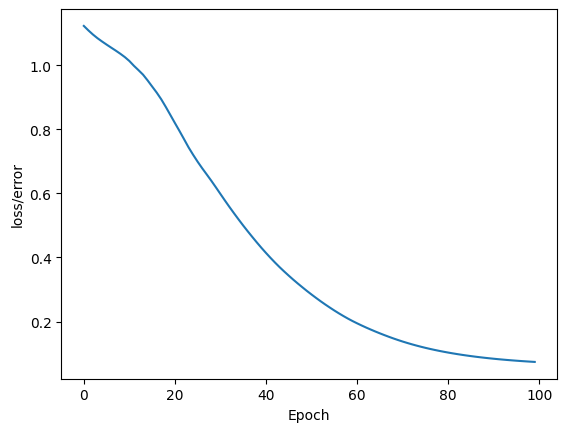

In [35]:
# graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

# 3.Evaluate Test Data Set On Network

In [36]:
# evaluate Model on test dataset(validate model on test set)
with torch.no_grad(): #basically turn off back propogation
    y_eval = model.forward(X_test) # X-test are features from our test set,y_eval will be predictions
    loss = criterion(y_eval, y_test) #find the loss or error
    print(loss)

tensor(0.0575)


In [37]:
corret = 0
with torch.no_grad(): 
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        # if y_test[i] == 0:
        #     x = 'setosa'
        # elif y_test[i] == 1:
        #     x = 'versicolor'
        # else:
        #     x = 'virginica'

        
        # will tell us what typ of flower class out network think it is
        print(f'{i + 1}. {str(y_val)} \t y_test:{y_test[i]} \t y_val: { y_val.argmax().item()}')

        #correct or not
        if y_val.argmax().item() == y_test[i]:
            corret += 1
    
    print(f'we got {corret} correct')

1. tensor([-4.1716,  5.0314,  2.5291]) 	 y_test:1 	 y_val: 1
2. tensor([ 5.1330, -2.7781, -3.1771]) 	 y_test:0 	 y_val: 0
3. tensor([ 4.0230, -1.7534, -2.6876]) 	 y_test:0 	 y_val: 0
4. tensor([-4.6494,  5.5576,  2.7156]) 	 y_test:1 	 y_val: 1
5. tensor([-6.2048,  4.2263,  6.8880]) 	 y_test:2 	 y_val: 2
6. tensor([-7.5163,  5.6673,  7.4118]) 	 y_test:2 	 y_val: 2
7. tensor([ 3.5807, -1.3334, -2.5046]) 	 y_test:0 	 y_val: 0
8. tensor([ 4.5113, -2.2228, -2.8847]) 	 y_test:0 	 y_val: 0
9. tensor([-4.2756,  5.4891,  2.1708]) 	 y_test:1 	 y_val: 1
10. tensor([ 4.4995, -2.1908, -2.8975]) 	 y_test:0 	 y_val: 0
11. tensor([-4.7794,  5.8376,  2.5969]) 	 y_test:1 	 y_val: 1
12. tensor([-7.2882,  4.4892,  8.3679]) 	 y_test:2 	 y_val: 2
13. tensor([-2.9024,  4.6610,  0.8063]) 	 y_test:1 	 y_val: 1
14. tensor([-3.0202,  4.8000,  0.8698]) 	 y_test:1 	 y_val: 1
15. tensor([-6.6180,  4.7994,  6.8852]) 	 y_test:2 	 y_val: 2
16. tensor([-6.8650,  3.8245,  8.4278]) 	 y_test:2 	 y_val: 2
17. tensor([-4.45

## 4. Evaluate new data on the network

In [38]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [40]:
with torch.no_grad():
    # print(model.forward(new_iris))
    print(model(new_iris))

tensor([ 4.6209, -2.3305, -2.9270])


## 5.save and load out nerual network model for pytorch and python

In [41]:
#save our NN model
torch.save(model.state_dict(), 'my_iris_model.pt')

In [42]:
# load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [44]:
# make sure it loaded correctly
new_model.eval() #Set the module in evaluation mode

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)